In [1]:
import os

# Obter o diretório atual
diretorio_atual = os.getcwd()
print("Diretório atual:", diretorio_atual)


Diretório atual: C:\Users\anna_\Documents\kobe_data_set\code


In [2]:
import pandas as pd
import numpy as np

import pycaret.classification as pc
import matplotlib.pyplot as plt
import mlflow

import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree, preprocessing, metrics, model_selection, linear_model
from sklearn import model_selection
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

import mlflow.tracking
import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


### Configurar MLFlow

In [3]:
experiment_name = 'Projeto Kobe'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id


from mlflow.tracking import MlflowClient
mlflow_client = MlflowClient()

mlflow.set_tracking_uri("sqlite:///mlruns.db")

In [7]:
df_dev.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30692
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695


In [6]:
from sklearn.model_selection import train_test_split
cols = ['lat','lon','minutes_remaining', 'period', 'playoffs', 'shot_distance','shot_made_flag']
train_perc = 0.8

with mlflow.start_run(experiment_id=experiment_id, run_name = 'PreparacaoDados'):


    df_dev = pd.read_parquet('C:\\Users\\anna_\\Documents\\kobe_dataset\\data\\raw\\dataset_kobe_dev.parquet')
    df_dev = df_dev[cols].copy()
    df_dev = df_dev.copy().dropna()
    df_dev.to_parquet('C:\\Users\\anna_\\Documents\\kobe_dataset\\data\\processed\\data_filtered.parquet')

    xtrain, xtest, ytrain,ytest = train_test_split(df_dev[['lat','lon','minutes_remaining', 'period', 'playoffs', 'shot_distance','shot_made_flag']],
                                                   df_dev['shot_made_flag'],
                                                   train_size=train_perc,
                                                   stratify=df_dev['shot_made_flag']) 

    xtrain['shot_made_flag'] = ytrain
    ytest['shot_made_flag'] = ytest
    xtrain.to_parquet('C:\\Users\\anna_\\Documents\\kobe_dataset\\data\\processed\\base_train.parquet')
    xtest.to_parquet('C:\\Users\\anna_\\Documents\\kobe_dataset\\data\\processed\\base_test.parquet')   
    
    mlflow.log_params({'perc_teste': 1-train_perc,
                        'colunas_selecionadas':cols})
    mlflow.log_params({'qtd_linhas_treino': xtrain.shape[0],
                       'qtd_linhas_treino': xtest.shape[0]})

MlflowException: No Experiment with id=511061145858412812 exists

In [ ]:
## vai ter que repsonder uma pergunta aqui tbm

In [32]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20285 entries, 1 to 30696
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                20285 non-null  float64
 1   lon                20285 non-null  float64
 2   minutes_remaining  20285 non-null  int64  
 3   period             20285 non-null  int64  
 4   playoffs           20285 non-null  int64  
 5   shot_distance      20285 non-null  int64  
 6   shot_made_flag     20285 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [34]:
df_dev.shape

(20285, 7)

In [47]:
df_dev.head()

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0


In [ ]:
#fazer analise exploratoria, histograma, distribuição

In [10]:
xtest

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
6180,33.9623,-118.2648,9,1,0,8,1.0
29873,34.0293,-118.2678,4,2,1,1,1.0
7402,34.0443,-118.2698,3,1,0,0,1.0
5928,34.0443,-118.2698,8,1,0,0,0.0
16906,33.8743,-118.1998,0,3,0,18,0.0
...,...,...,...,...,...,...,...
7162,34.0443,-118.2698,7,3,0,0,0.0
23697,34.0443,-118.2698,4,2,0,0,1.0
21561,33.9993,-118.1488,4,3,0,12,0.0
7693,34.0443,-118.2698,1,4,0,0,0.0


## Treinamento do Modelo

In [6]:
exp = pc.setup(
    data = xtrain,
    target = 'shot_made_flag',
    test_data=xtest,
    normalize=True,
    log_experiment = False
)
list_models = exp.compare_models(['lr','dt'], n_select=2, sort='f1')
list_models
exp.plot_model(list_models[0], plot='vc', save= True)                                 

,Description,Value
0,Session id,6236
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(20285, 7)"
5,Transformed train set shape,"(16228, 7)"
6,Transformed test set shape,"(4057, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5394,0.5196,0.5848,0.5154,0.5479,0.0822,0.0829,1.1330
lr,Logistic Regression,0.5790,0.6028,0.4898,0.5685,0.5261,0.1512,0.1526,1.4790


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

'Validation Curve.png'

In [ ]:
#selecionar 1 dos 2 e justifica pelo f1, a curva de validação ta na imagem


In [12]:
import jinja2
print(jinja2.__version__)

3.1.3


In [14]:
import mlflow
print(mlflow.__version__)

2.11.3


In [16]:
import sys
print("Python Version:", sys.version)

Python Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [7]:
from sklearn.model_selection import validation_curve
def plot_parameter_validation_curve(X, Y, param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = X, 
                                                 y = Y, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=10,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


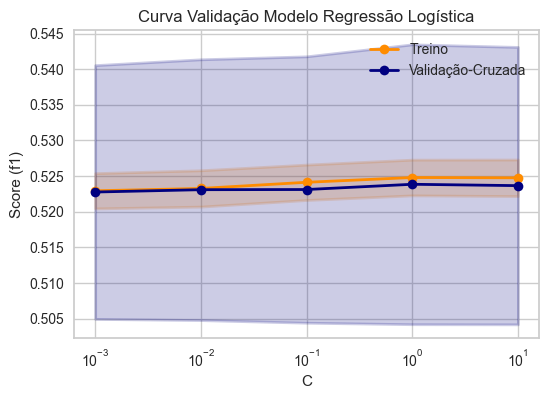

<Figure size 800x550 with 0 Axes>

In [8]:

plot_parameter_validation_curve(xtrain.drop('shot_made_flag',axis=1), ytrain, 'C', {'C': [0.001,0.01,0.1,1,10]},
                                list_models[1], 'Regressão Logística', 'f1', logx=True) # meu listmodels[1] é a regressão logista e o 0 é a decision tree classifier
plt.savefig('validation_curve.png')
mlflow.log_artifact('validation_curve.png')
#os.remove('validation_curbe.png') NAO REMOVE, PQ SENAO SO FICA SALVO NO MLFLOW, AQUI PROVALVEMENTE SÓ VAI FUNCIONAR A REGRESSAO

In [9]:
#VAI PRECISAR DA PRECIÇÃO DO MODELO
#Aqui é para o a regressão losgitcs
from sklearn.metrics import log_loss


yhat_test = exp.predict_model(list_models[0])

mlflow.log_metrics({
        'lr_log_loss': log_loss(yhat.test.shot_made_flag, yhat_test.prediction_label),
         'lr_f1': f1_score(yhat.test.shot_made_flag, yhat_test.prediction_label)})


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5398,0.5240,0.5823,0.5160,0.5472,0.0828,0.0835


NameError: name 'yhat' is not defined

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5398,0.5240,0.5823,0.5160,0.5472,0.0828,0.0835


Parameter: max_depth
GridSearch: [2, 3, 4, 5, 6, 7, 8]
Scoring: f1


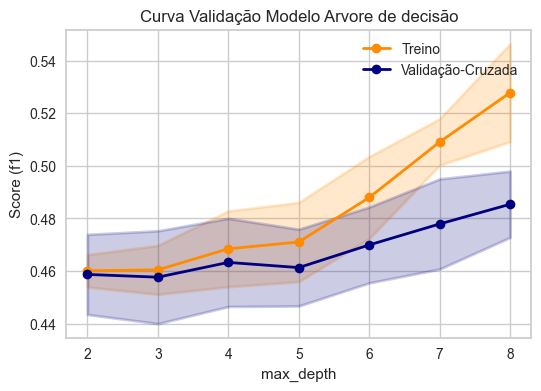

<Figure size 800x550 with 0 Axes>

In [10]:
from sklearn.metrics import log_loss, f1_score


yhat_test = exp.predict_model(list_models[0])
plot_parameter_validation_curve(xtrain.drop('shot_made_flag',axis=1), ytrain, 'max_depth', {'max_depth': [2,3,4,5,6,7,8]},
                                list_models[0], 'Arvore de decisão', 'f1', logx=False) # meu listmodels[1] é a regressão logista e o 0 é a decision tree classifier
plt.savefig('validation_curve.png')
mlflow.log_artifact('validation_curve.png')

mlflow.log_metrics({
        'dr_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
         'dr_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)})
plt.savefig('dt_validation_curve.png')
mlflow.log_artifact('dt_validation_curve.png')

In [11]:
    #Finalização do melhor modelo - tem que ver qual é  melhor 
tune_model = exp .tune_model(list_models[0],
                            optimize = 'f1',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 4)
yhat_test = exp.predict_model(tune_model)
mlflow.log_metrics({
        'tune_model_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
         'tune_model_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)})
final_model = exp.finalize_model(tune_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5884,0.5787,0.3626,0.6176,0.4569,0.1602,0.1750
1,0.6001,0.5898,0.3613,0.6452,0.4632,0.1832,0.2028
2,0.6063,0.5956,0.3587,0.6619,0.4653,0.1951,0.2181
3,0.5915,0.5816,0.3626,0.6244,0.4588,0.1663,0.1822
4,0.6094,0.5999,0.3897,0.6523,0.4879,0.2033,0.2210
5,0.6014,0.5919,0.3806,0.6385,0.4770,0.1870,0.2034
6,0.5872,0.5772,0.3605,0.6145,0.4544,0.1572,0.1717
7,0.5977,0.5866,0.3463,0.6458,0.4508,0.1767,0.1982
8,0.5783,0.5677,0.3359,0.6047,0.4319,0.1381,0.1533


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5398,0.5240,0.5823,0.5160,0.5472,0.0828,0.0835


,Description,Value
0,Session id,8624
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(20285, 7)"
5,Transformed train set shape,"(16228, 7)"
6,Transformed test set shape,"(4057, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5412,0.5220,0.5800,0.5173,0.5468,0.0854,0.0860,0.8640
lr,Logistic Regression,0.5790,0.6028,0.4898,0.5685,0.5261,0.1512,0.1526,1.3760


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5403,0.5246,0.5854,0.5164,0.5488,0.0840,0.0847


Parameter: max_depth
GridSearch: [2, 3, 4, 5, 6, 7, 8]
Scoring: f1


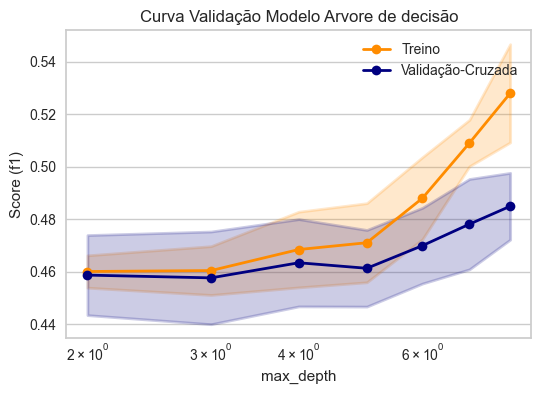

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5654,0.5817,0.4822,0.5514,0.5145,0.1244,0.1253


Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


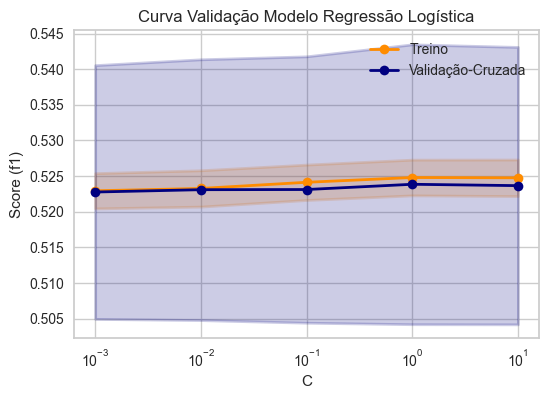

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5884,0.5915,0.4284,0.5961,0.4985,0.1651,0.1715
1,0.5823,0.5891,0.4413,0.5826,0.5022,0.1540,0.1584
2,0.5933,0.5960,0.3600,0.6298,0.4581,0.1697,0.1868
3,0.5816,0.5905,0.4452,0.5808,0.5040,0.1531,0.1571
4,0.6044,0.6116,0.4387,0.6216,0.5144,0.1971,0.2056
5,0.5915,0.6049,0.4839,0.5878,0.5308,0.1751,0.1777
6,0.5798,0.5840,0.4315,0.5799,0.4948,0.1482,0.1529
7,0.6020,0.6117,0.4587,0.6100,0.5236,0.1934,0.1992
8,0.5610,0.5581,0.3773,0.5594,0.4506,0.1076,0.1134


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5403,0.5246,0.5854,0.5164,0.5488,0.0840,0.0847


OSError: Cannot save file into a non-existent directory: 'kobe_dataset\data\processed'

In [15]:
registered_model_name = 'modelo Kobe'  
nexamples = 5
model_version = -1

with mlflow.start_run(experiment_id = experiment_id, run_name = 'Treinamento'): 
    
    exp = pc.setup(
        data = xtrain,
        target = 'shot_made_flag',
        test_data=xtest,
        normalize=True,
        log_experiment = False
    )    
    list_models = exp.compare_models(['lr','dt'], n_select=2, sort='f1')
    list_models
    
    ## Árvore de decisão
    yhat_test = exp.predict_model(list_models[0])
    plot_parameter_validation_curve(xtrain.drop('shot_made_flag',axis=1), ytrain, 'max_depth', {'max_depth': [2,3,4,5,6,7,8]},
                                    list_models[0], 'Arvore de decisão', 'f1', logx=True) # meu listmodels[1] é a regressão logista e o 0 é a decision tree classifier
    plt.savefig('dt_validation_curve.png')
    mlflow.log_artifact('dt_validation_curve.png')
    
    mlflow.log_metrics({
        'dr_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
         'dr_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)})


    #Regressão Logistica
    yhat_test = exp.predict_model(list_models[1])
    
    plot_parameter_validation_curve(xtrain.drop('shot_made_flag',axis=1), ytrain, 'C', {'C': [0.001,0.01,0.1,1,10]},
                                list_models[1], 'Regressão Logística', 'f1', logx=True) # meu listmodels[1] é a regressão logista e o 0 é a decision tree classifier
    
    plt.savefig('lr_validation_curve.png')
    mlflow.log_artifact('lr_validation_curve.png')
    mlflow.log_metrics({
        'lr_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
         'lr_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)})

    
    ## Finalizando melhor modelo
    tune_model = exp .tune_model(list_models[0],
                            optimize = 'f1',
                            search_library = 'scikit-learn',
                            search_algorithm = 'random',
                            n_iter = 4)
    yhat_test = exp.predict_model(tune_model, raw_score=True)
    mlflow.log_metrics({
        'tune_model_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
         'tune_model_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)})
    yhat_test.to_parquet("kobe_dataset/data/processed/prediction_test.parquet")
    mlflow.log_artifact("kobe_dataset/data/processed/prediction_test.parquet")
    
    final_model = exp.finalize_model(tune_model)                    
                        
    
    
    #salvando o modelo - exportação apra log do modelo
    exp.save_model(final_model, f'./{registered_model_name}') 
    # Carrega novamente o pipeline + bestmodel
    model_pipe = exp.load_model(f'./{registered_model_name}')
    # Assinatura do Modelo Inferida pelo MLFlow
    model_features = list(xtrain.drop('shot_made_flag',axis=1).columns)
    inf_signature = infer_signature(xtrain[model_features], model_pipe.predict(xtrain.drop('shot_made_flag', axis=1)))
    # Exemplo de entrada para o MLmodel
    input_example = {x: xtrain[x].values[:nexamples] for x in model_features}
    # Log do pipeline de modelagem do sklearn e registrar como uma nova versao
    mlflow.sklearn.log_model(
        sk_model=model_pipe,
        artifact_path="sklearn-model",
        registered_model_name=registered_model_name,
        signature = inf_signature,
        input_example = input_example,
        pyfunc_predict_fn='predict_proba'
    )
    # Criacao do cliente do servico MLFlow e atualizacao versao modelo
    client = MlflowClient()
    if model_version == -1:
        model_version = client.get_latest_versions(registered_model_name)[-1].version
    # Registrar o modelo como staging
    client.set_registered_model_alias(
        name    = registered_model_name, 
        alias   = "staging", 
        version = model_version
        )
###AQUI RESPONDE A QUESTÃO 8 ###

In [13]:
mlflow.end_run()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5497,0.5309,0.5885,0.5253,0.5551,0.1022,0.1028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5770,0.5971,0.4765,0.5680,0.5182,0.1464,0.1482


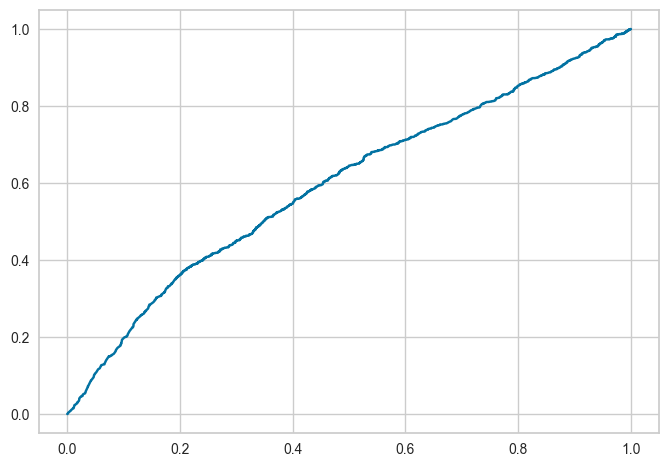

In [41]:
##CUrva ROC e fazer mis botinha com label e cores e tals

from sklearn.metrics import roc_curve

yhat_test = exp.predict_model(list_models[0], raw_score=True)

fpr, tpr, thr = roc_curve(yhat_test.shot_made_flag, yhat_test.prediction_score_1)

plt.plot(fpr,tpr)

yhat_test = exp.predict_model(list_models[1], raw_score=True)

fpr, tpr, thr = roc_curve(yhat_test.shot_made_flag, yhat_test.prediction_score_1)

plt.plot(fpr,tpr)

In [ ]:
## depois de rodar o application.py vai aparecer um arquivo parquet no ml flow
# stream lit 1:49 - pra rodar o stream lit é só streamlit run app.py

## pra subir no git
# git add code/ data
# git status 